## softmax回归
logstic回归是用线性回归处理二分类的回归任务，那如果用线性回归处理多分类的任务呢？这时使用softmax回归。  

###  思路
  
**1.** 观看二分类任务的logstic回归  

Sigmoid函数：<img src="../../img/sigmoid.png" width="300" height="300">  
  
  
  
$Y=W_1*X$用来当做预测X为l类的可能值 

Sigmoid函数：$y=\frac {1}{1+e^{-(W_1X)}}\quad$ 把这个式子看成求y是1类的后验概率 $\quad  p(y=1|x)=\frac {e^{(W_1X)}}{1+e^{(W_1X)}} \quad p(y!=1|x)=\frac {1}{1+e^{(W_1X)}} \qquad $  


在二分类任务时，我们处理单个样本时是把>0.5的处理成1类，<=0.5处理成二类；其从后验概率的角度看是样本为1的后验概率大于0.5则认为样本为1类，否则是样本为1类的后验概率小于0.5，认为其不大可能是1类，则归为2类。  
  
**2.** 现在我们把其推广到多分类任务[1,2,...,k]时，我们再来看Sigmoid的函数:  
二分类时Sigmoid函数把求y预测值转为求y为某类的可能的后验概率，现在类推多类时我们也用线性方式把求y为某类的预测值，转为求y为某类的可能后验概率：  

$\qquad \qquad\; \qquad\; \qquad\;  \qquad\; \qquad\; \qquad\; \qquad\; Y_1=W_1*X\qquad $  
$\qquad \qquad\; \qquad\; \qquad\;  \qquad\; \qquad\; \qquad\; \qquad\; Y_2=W_2*X\qquad $  
$\qquad \qquad\; \qquad\; \qquad\;  \qquad\; \qquad\; \qquad\;\;\;\qquad\;{\cdots}{\cdots}{\cdots}{\cdots}$  
$\qquad \qquad\; \qquad\; \qquad\;  \qquad\; \qquad\;\qquad\;\;\;\qquad\;{\cdots}{\cdots}{\cdots}{\cdots}$     
$\qquad \qquad\; \qquad\; \qquad\;  \qquad\; \qquad\; \qquad\; \qquad\; Y_i=W_i*X\qquad $  
$\qquad \qquad\; \qquad\; \qquad\;  \qquad\; \qquad\;\qquad\;\;\;\qquad\;{\cdots}{\cdots}{\cdots}{\cdots}$  
$\qquad \qquad\; \qquad\; \qquad\;  \qquad\; \qquad\;\qquad\;\;\;\qquad\;{\cdots}{\cdots}{\cdots}{\cdots}$    
$\qquad \qquad\; \qquad\; \qquad\;  \qquad\; \qquad\; \qquad\; \qquad\; Y_k=W_k*X\qquad $    
  

我们处理单个样本时,要把求y的预测值转为求y为某类的可能概率：y可能为[1,2,...,k]的某一个:  
$\color{red}{\bf利用正则化(概率为正，所以先正则化)和归一化就可以把线性模型预测的Y的值，转化为预测y属于某类的后验概率  }$  
    
进行正则化，也就是进行广义的线性模型，不会影响预测（一一对应）主要是Y的预测值映射为正值：  
  
$\qquad \qquad\; \qquad\; \qquad\;  \qquad\; \qquad\; \qquad\; \qquad\; Y_1=e^{W_1*X}\qquad $  
$\qquad \qquad\; \qquad\; \qquad\;  \qquad\; \qquad\; \qquad\; \qquad\; Y_2=e^{W_2*X}\qquad $  
$\qquad \qquad\; \qquad\; \qquad\;  \qquad\; \qquad\; \qquad\;\;\;\qquad\;{\cdots}{\cdots}{\cdots}{\cdots}$  
$\qquad \qquad\; \qquad\; \qquad\;  \qquad\; \qquad\;\qquad\;\;\;\qquad\;{\cdots}{\cdots}{\cdots}{\cdots}$     
$\qquad \qquad\; \qquad\; \qquad\;  \qquad\; \qquad\; \qquad\; \qquad\; Y_i=e^{W_i*X}\qquad $  
$\qquad \qquad\; \qquad\; \qquad\;  \qquad\; \qquad\;\qquad\;\;\;\qquad\;{\cdots}{\cdots}{\cdots}{\cdots}$  
$\qquad \qquad\; \qquad\; \qquad\;  \qquad\; \qquad\;\qquad\;\;\;\qquad\;{\cdots}{\cdots}{\cdots}{\cdots}$    
$\qquad \qquad\; \qquad\; \qquad\;  \qquad\; \qquad\; \qquad\; \qquad\; Y_k=e^{W_k*X}\qquad $    
  
    
  
  
  
归一化：把预测的Y值转变为Y为某类的概率分布(预测为某类的概率)：  
  
  
  
$ \qquad \qquad\; \qquad\; \qquad \qquad \qquad  \begin{bmatrix} p(y=1|x) \\ p(y=2|x)\\{\vdots}\\p(y=i|x)\\{\vdots} \\p(y=k|x) \end{bmatrix} \;= \;\; \begin{bmatrix} \frac {e^{(W_1X)}}{\sum_{i=1}^j e^{(W_iX)}} \\ \frac {e^{(W_2X)}}{\sum_{i=1}^j e^{(W_iX)}}\\{\vdots}\\\frac {e^{(W_iX)}}{\sum_{i=1}^j e^{(W_iX)}} \\{\vdots}\\\frac {e^{(W_kX)}}{\sum_{i=1}^j e^{(W_iX)}} \end{bmatrix}\;=\;  \frac {1}{\sum_{i=1}^j e^{(W_iX)}} * \begin{bmatrix} e^{(W_1X)} \\ e^{(W_2X)}\\{\vdots}\\e^{(W_iX)} \\{\vdots}\\e^{(W_kX)} \end{bmatrix}$
  
既然现在已经得到了预测的y为各个类的概率，则可以开始求正确概率的极大似然函数：  
  
样本X的正确预测：$p(y=i|x)={\sum_{i=1}^k} \{y =\,= k\}p(y=i|x) \;=\; \begin{bmatrix} 0 &0 &{\cdots}&\underset{y真实标记位置}{1} &\;{\cdots} &0 \end{bmatrix} * \begin{bmatrix} \frac {e^{(W_1X)}}{\sum_{i=1}^j e^{(W_iX)}} \\ \frac {e^{(W_2X)}}{\sum_{i=1}^j e^{(W_iX)}}\\{\vdots}\\\frac {e^{(W_iX)}}{\sum_{i=1}^j e^{(W_iX)}} \\{\vdots}\\\frac {e^{(W_kX)}}{\sum_{i=1}^j e^{(W_iX)}} \end{bmatrix}\;=\;t_{ik}*P(X_i)$  
  
参数$W$的极大似然值：$lnp( \prod_{i=1}^n  p(y=i|x)) \;=\;{\sum_{i=1}^n} lnp(p(y=i|x)\;={\underset{对列,行求和} {sum}(Tik.*ln(P))}\;\;（点乘）$  
  
$$
       Tik= \begin{pmatrix}
        0 & 0 & 1 & \cdots & 0 \\
        1 & 0 & 0& \cdots & 1 \\
        \vdots & \vdots & \vdots & \ddots & \vdots \\
        0 & 1 & 0 & \cdots & 0\\
        \end{pmatrix}_{k\times n}
$$
  
<br>   
<br> 

$$
       P= \begin{pmatrix}
        \frac {e^{(W_1X_1)}}{\sum_{i=1}^j e^{(W_iX_1)}} & \frac {e^{(W_1X_2)}}{\sum_{i=1}^j e^{(W_iX_2)}} & \cdots & \frac {e^{(W_1X_n)}}{\sum_{i=1}^j e^{(W_iX_n)}} \\
       \frac {e^{(W_2X_1)}}{\sum_{i=1}^j e^{(W_iX_1)}} & \frac {e^{(W_2X_2)}}{\sum_{i=1}^j e^{(W_iX_2)}} & \cdots & \frac {e^{(W_2X_n)}}{\sum_{i=1}^j e^{(W_iX_n)}} \\
        \vdots &  \vdots & \ddots & \vdots \\
       \frac {e^{(W_kX_1)}}{\sum_{i=1}^j e^{(W_iX)_1}} & \frac {e^{(W_kX_2)}}{\sum_{i=1}^j e^{(W_iX_2)}} & \cdots & \frac {e^{(W_kX_n)}}{\sum_{i=1}^j e^{(W_iX_n)}}\\
        \end{pmatrix}_{k\times n}
$$
  
<br>  
<br> 


$$
       W= \begin{pmatrix}
        w1_1& w2_1 & \cdots & wk_1 \\
        w1_2 & w2_2  & \cdots &wk_2 \\
        \vdots &  \vdots & \ddots & \vdots \\
       w1_j & w2_j & \cdots & wk_j\\
        \end{pmatrix}_{j\times k}
$$  
  
<br>  
<br> 
      
$$
       X= \begin{pmatrix}
        x1_1& x2_1 & \cdots & xn_1 \\
        x1_2 & x2_2  & \cdots &xn_2 \\
        \vdots &  \vdots & \ddots & \vdots \\
       x1_j & x2_j & \cdots & xn_j\\
        \end{pmatrix}_{j\times n}
$$  
  
<br> 
<br>  
  
  
  
所以最终的极大似然函数值为：  ${\underset{W}{maxarg}}=\underset{对列,行求和}{sum}(Tik.*ln(P))=\underset{对列，行求和}{sum}(Tik.*ln((\frac {e^{(W^TX)}}{\underset{对列求和}{sum (e^{(W^TX))})}}) ))\quad(这里是点乘)$  
  
  
$\qquad\qquad\qquad\qquad\;\;\;\;E(W)=-{\underset{W}{minarg}}=-\underset{对列,行求和}{sum}(Tik.*ln(P))=-\underset{对列，行求和}{sum}(Tik.*ln((\frac {e^{(W^TX)}}{\underset{对列求和}{sum} (\;e^{(W^TX)}\;)}))\;)$  
   
  
$\qquad\qquad\qquad\qquad\;\;\;\;E(W)=-{\underset{W}{minarg}}=-\underset{对列,行求和}{sum}(Tik.*ln(P))=-\underset{对列，行求和}{sum}(Tik.*[（ln( {e^{(W^TX)}})-ln({\underset{对列求和}{sum} (\;e^{(W^TX)}\;)})]\;)$    
  
$\qquad\qquad\qquad\qquad\;\;\;\;\frac {\partial E(W)}{\partial W}=-(Tik.*(X^T-\frac{e^{(W^TX)}X^T}{\underset{对列求和}{sum} (\;e^{(W^TX)}\;)})\;)
\quad$  
$\qquad\qquad\qquad\qquad\;\;\;\;（因为是对整个W求导不是对分量w_1{\cdots}w_k 求偏导，所以sum去掉，想当于求分量的偏导后，再和起来。）$
  
$\qquad\qquad\qquad\qquad\;\;\;\;\frac {\partial E(W)}{\partial W}=-((Tik-\frac{e^{(W^TX)}}{ \underset{对列求和}{sum}(\;e^{(W^TX)}\;)})X^T\;) $    

使用梯度下降法求最优解：  
$\qquad\qquad\qquad\qquad\;\;\;\;W^{t+1}=W^{t}-\eta(\;-((Tik-\frac{e^{(W^TX)}}{\underset{对列求和}{sum} (\;e^{(W^TX)}\;)})X^T\;)^T \;)$  
  
用训练的模型预测时找其中最大值：  
  
$\qquad\qquad\qquad\qquad\;\;\;\; Y_i=W_i*X\qquad $   
  
    
      
        
### 总结
从上述的计算过程可以看出，最要的就是计算每个样本的各个可能类别所占的概率，这个过程可以抽象成softmax函数：  
  
    
    
softmax函数（softmax operator）解决了输出值的范围不确定，我们难以直观上判断这些值的意义，将输出值变换成值为正且和为1的概率分布：

$$\hat{y}_1, \hat{y}_2, \hat{y}_3 = \text{softmax}(o_1, o_2, o_3),$$

其中

$$
\hat{y}_1 = \frac{ \exp(o_1)}{\sum_{i=1}^3 \exp(o_i)},\quad
\hat{y}_2 = \frac{ \exp(o_2)}{\sum_{i=1}^3 \exp(o_i)},\quad
\hat{y}_3 = \frac{ \exp(o_3)}{\sum_{i=1}^3 \exp(o_i)}.
$$  
  
<br>
<br>
      
softmax函数有三个重要的性质：  
softmax函数将任意n维实值向量转换为取值范围为（0，1）之间的n维实值向量，并且和为1。  

1.单调递增函数，因此不改变原始数据的大小顺序   

2.讲原始数据映射到（0，1）之间，和为1，表征概率  

3.$Softmax(x)=Softmax(x+c)$ 这个性质重要，涉及到数据的稳定性。在python中由于浮点数范围限制，当超出限制会出错，一般$C=-max(x)$

(785, 10)
准确率
0.915
用时：
806.5617842674255


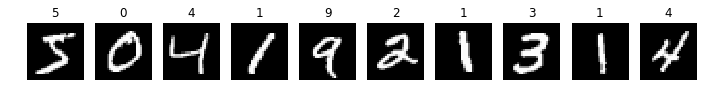

In [5]:
#实例识别图片中0到10
%matplotlib inline
import time
from mxnet.gluon import data as gdata
import numpy as np
import struct   #处理数据流
import sys
sys.path.append("..")
from matplotlib import pyplot as plt
import time
import tools.readimg as tl
import bigfloat
import math
from numpy import matlib


#生成训练数据和测试数据
f_train="../../img/train-images.idx3-ubyte"
ff_train="../../img/train-labels.idx1-ubyte"
f_test="../../img/t10k-images.idx3-ubyte"
ff_test="../../img/t10k-labels.idx1-ubyte"
imgs_train=tl.readallimg(f_train)
labs_train=tl.readalllabels(ff_train)
img_test=tl.readallimg(f_train)
lab_test=tl.readalllabels(ff_train)

#图片转为样本矩阵
def tranexample(imgs_train):
    Tr_x=[]    
    for i in imgs_train:
        Tr_x.append(((np.row_stack(( i.reshape(784,1),1))).reshape(1,785))[0])
    return Tr_x
#print((np.array(Tr_x)).shape)  
Tr_x=tranexample(imgs_train)

#初始化参数
W=(np.random.normal(scale=0.1,size=(10,785))).T
print(W.shape)

#定义训练算法
def train(W,X,Y,eta,ecoh):
    for i in range(ecoh):
        #print(i)
        maxW=np.amax(np.dot(W.T,X),0)
        a=np.exp(np.dot(W.T,X)-maxW)
        c=a/a.sum(0)
        Tik=[]
        Lk=np.linspace(0,9,10)
        for i in range(len(Y)):    
            for j in range(len(Lk)):
                
                if Y[i]==Lk[j]:
                    Tik.append(1)
                else :
                    Tik.append(0)         
        Tik=np.array(Tik)
        Tik=np.mat(Tik.reshape(len(Y),len(Lk))).T
        d=-np.dot(Tik-c , X.T)
        W=W-eta*d.T 
    return W

#预测函数：
def predict(W,img_test):
    img_test=(np.array(img_test)).reshape((np.array(img_test).shape[0],1))
    #Y=np.exp(np.dot(W.T,img_test))
    #Y=np.nan_to_num(Y)
    Y=np.dot(W.T,img_test)
    k=((Y.reshape(1,len(Y))).argmax(1))
    return k

#准确率
def accure(W,img_test,lab_test):
    pre_lab=[]
    num=0
    for  i in range(len(lab_test)):
        k=predict(W,img_test[:,i])
        k=np.array(k)
        k=(k[0])[0]
        pre_lab.append(k)
        if k == lab_test[i] :
            num+=1
    return num/len(lab_test) ,pre_lab


#开始训练
eta=0.01
ecoh=300
labs_train1=np.array(labs_train)
Tr_x1=np.array(Tr_x)
#labs_train1=labs_train1.reshape(labs_train1.shape[0],1)
start=time.time()
W1=train(W,Tr_x1.T,labs_train1,eta,ecoh)

img_test1=np.array(tranexample(img_test))
preaccure,prelab=accure(W1,img_test1.T,lab_test)
print('准确率')
print(preaccure)
print('用时：')
print(time.time()-start)
tl.showimg(img_test,prelab)

